In [1]:
import sys
sys.path.append('..')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import scipy.stats as stats
import plotly.express as px
import urbanpy as up
import sklearn.metrics as metrics
from geopy import Nominatim
from matplotlib import rcParams
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.notebook import tqdm
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider
from sklearn.linear_model import Ridge, LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [68]:
df=pd.read_csv('https://raw.githubusercontent.com/Jhovanylara/Land-Prices-at-Mexico-City/master/Datasets/ETL.csv')

In [69]:
missing_cost=df.loc[df['target']==0] #Hacemos un dataframe solo con los costos vacíos
df['target'].replace(0,np.nan, inplace=True) #Reemplazamos por NaN
df=df.dropna(subset="target") #Eliminamos las filas con datos faltantes

In [73]:
#Obtenemos df sin colonia ni Alcaldia
X=df.iloc[:,2:]


In [74]:
#Quitamos los Outliers
list=[]
for col in X.columns:
    list.append(col)
list.remove('lat')
list.remove('lon')

df_Limpieza = X
print(f'Tamaño muestra: {len(df_Limpieza)}')

filtro1 = np.array([True] * len(df_Limpieza))

for col in list:
    zscore = abs(stats.zscore(df_Limpieza[col])) 
    filtro1 = (zscore < 2) & filtro1  #PONEMOS UN FILTRO DE ZSCORE >= 2
    
df_SinOutliers = df_Limpieza[filtro1] 

print(f'Total Outliers: {len(df_Limpieza)-len(df_SinOutliers)}')
print(f'Muestra sin Outliers: {len(df_SinOutliers)}')

Tamaño muestra: 678
Total Outliers: 187
Muestra sin Outliers: 491


In [75]:
#Separamos la variable objetivo
X=df_SinOutliers.iloc[:,:-1]
y=df_SinOutliers.iloc[:,-1]

In [76]:
#Separamos en train y test para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0)

Obtenemos los features mas importantes

In [77]:
# permutation feature importance with knn for regression

from matplotlib import pyplot
# define dataset

model = KNeighborsRegressor()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean


In [79]:
list=X_train.columns.values.tolist()

In [81]:
features=pd.DataFrame({'feature':list, 'MSE':importance})
features.sort_values(by='MSE', ascending=False, inplace=True)

In [98]:

erase_columns=features.iloc[16:,:1]
erase_columns.feature.values.tolist()

['marketplace_dist(km)',
 'clinic_dist(km)',
 'convenience_dist(km)',
 'mall_near',
 'university_dist(km)',
 'bank_dist(km)',
 'hospital_dist(km)',
 'atm_dist(km)',
 'greengrocer_dist(km)',
 'butcher_dist(km)',
 'kindergarten_dist(km)',
 'hospital_near',
 'doctors_near',
 'marketplace_near',
 'kindergarten_near',
 'clinic_near',
 'atm_near',
 'butcher_near']

In [ ]:
toerase=['marketplace_dist(km)', 'clinic_dist(km)', 'convenience_dist(km)', 'mall_near','univeristy_dist(km)', 'bank_dist(km)', 'hospital_dist(km)', 'atm_dist(km)', 'greengrocer_dist(km)', 'butcher_dist(km)', 'kindergarten_dist(km)', 'hospital_near', 'marketplacer_near','kindergarten_near','clinic_near','atm_near', 'butcher_near']

C:\Users\Preparatoria\AppData\Local\Temp\ipykernel_3248\1975495366.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


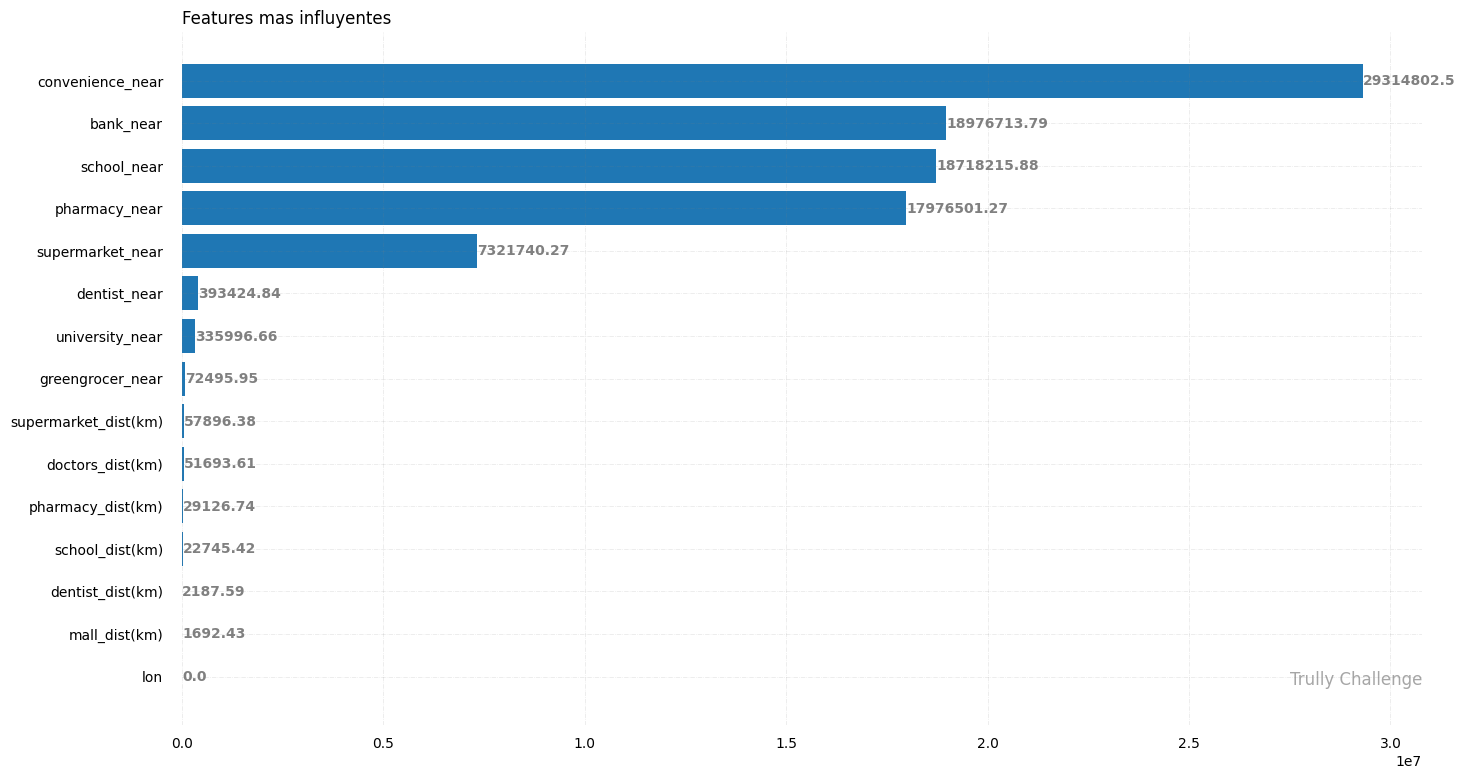

In [88]:
feature = features['feature'].head(15)
MSE = features['MSE'].head(15)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(feature, MSE)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Features mas influyentes',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Trully Challenge', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()